Allison Forte

Assignemnt 11.2: (13.1)

May 29, 2022

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

# 13.1
In NSFG Cycles 6 and 7, the variable cmdivorcx contains the date of divorce for the respondent’s first marriage, if applicable, encoded in century-months.

Compute the duration of marriages that have ended in divorce, and the duration, so far, of marriages that are ongoing. Estimate the hazard and survival curve for the duration of marriage.

Use resampling to take into account sampling weights, and plot data from several resamples to visualize sampling error.

Consider dividing the respondents into groups by decade of birth, and possibly by age at first marriage.

In [62]:
import numpy as np
import pandas as pd
import thinkstats2
import thinkplot
import nsfg
import os
os.chdir('/Users/allison.forte/Downloads//ThinkStats2-master/code')
import survival

In [63]:
# load data
#preg = nsfg.ReadFemPreg()
resp6 = survival.ReadFemResp2002()
resp7 = survival.ReadFemResp2010()
resps = [resp6, resp7]

# clean resp6
resp6.cmdivorcx.replace([9998, 9999], np.nan, inplace=True)
resp6['notdivorced'] = resp6.cmdivorcx.isnull().astype(int)
resp6['duration'] = (resp6.cmdivorcx - resp6.cmmarrhx) / 12.0
resp6['durationsofar'] = (resp6.cmintvw - resp6.cmmarrhx) / 12.0

month0 = pd.to_datetime("1899-12-15")
dates = [month0 + pd.DateOffset(months=cm) for cm in resp6.cmbirth]
resp6['decade'] = (pd.DatetimeIndex(dates).year - 1900) // 10

married6 = resp6[resp6.evrmarry == 1]

# clean resp7
resp7.cmdivorcx.replace([9998, 9999], np.nan, inplace=True)
resp7['notdivorced'] = resp7.cmdivorcx.isnull().astype(int)
resp7['duration'] = (resp7.cmdivorcx - resp7.cmmarrhx) / 12.0
resp7['durationsofar'] = (resp7.cmintvw - resp7.cmmarrhx) / 12.0

month0 = pd.to_datetime("1899-12-15")
dates = [month0 + pd.DateOffset(months=cm) for cm in resp7.cmbirth]
resp7['decade'] = (pd.DatetimeIndex(dates).year - 1900) // 10

married7 = resp7[resp7.evrmarry == 1]

In [64]:
# codes needed for solution


def EstimateSurvivalByDecade(groups, **options):
    #  Groups respondents by decade and plots survival curves.  
    thinkplot.PrePlot(len(groups))
    for name, group in groups:
        _, sf = EstimateSurvival(group)
        thinkplot.Plot(sf, **options)
        
        
def EstimateSurvival(resp):
    #  Estimates the survival curve and returns Hazard Function, Survival Function
    complete = resp[resp.notdivorced == 0].duration.dropna()
    ongoing = resp[resp.notdivorced == 1].durationsofar.dropna()

    hf = survival.EstimateHazardFunction(complete, ongoing)
    sf = hf.MakeSurvival()

    return hf, sf


def ResampleDivorceCurveByDecade(resps):
    #  Plots divorce curves for each decade cohort
    for i in range(41):
        samples = [thinkstats2.ResampleRowsWeighted(resp) for resp in resps]
        sample = pd.concat(samples, ignore_index=True)
        groups = sample.groupby("decade")
        if i == 0:
            survival.AddLabelsByDecade(groups, alpha=0.7)

        EstimateSurvivalByDecade(groups, alpha=0.1)

    thinkplot.Config(xlabel="Years", ylabel="Fraction undivorced", axis=[0, 28, 0, 1])

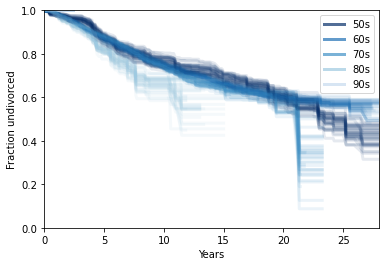

In [65]:
# Solve exercise by running ResampleDivorceCurveByDecade which will call EstimateSurvivalByDecade to group the data by decade. 
# EstimateSurvivalByDecade will also call EstimateSurvival in order calculate the hazard function and survival functions.
# Ultimately ResampleDivorceCurveByDecade plots the results using color coding for decade groups

ResampleDivorceCurveByDecade([married6, married7])